# LIVER DISEASE PREDICTION

**In this project, we are going to use the Indian Liver Patient Records dataset from kaggle.**

**We are going to predict whether a patient has liver disease or not based on certain features.**

**We are going to check with the total proteins,albumin etc whether it is asscoiated with disease or not.**

**Importing the Necessary Libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**For the purpose of prediction, we need to import more libraries. As we move on, we will import them.**

**Reading the Dataset:**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

patients = pd.read_csv('../data/dataset/indian_liver_patient.csv')

In [3]:
patients.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
patients["Total_Bilirubin"].max()

75.0

In [5]:
patients.shape

(583, 11)

**So there are 583 rows and 11 columns in our dataset.**

**Let us make the Gender column into numerical format:**

In [6]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [7]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Here there is a column named Dataset which has two values. Here one of the value symbolises that the patient has 
disease and the other value symbolises that the patient has no disease.**

**Let us check the number of male and female using a countplot.**

<Axes: xlabel='Gender'>

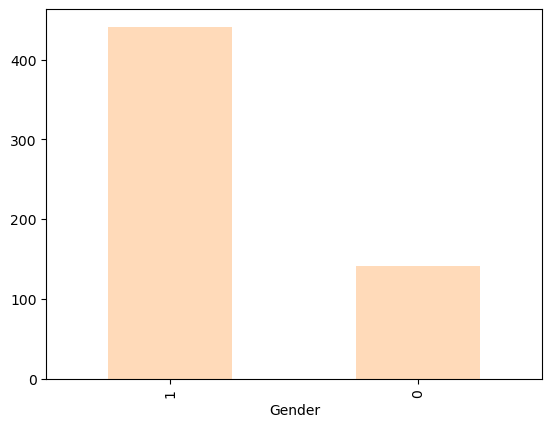

In [8]:
patients['Gender'].value_counts().plot.bar(color='peachpuff')

**From the above graph, we can see that Number of males are more than the Number of females.**

**Let us check the countplot of our Dataset column:**

<Axes: xlabel='Dataset'>

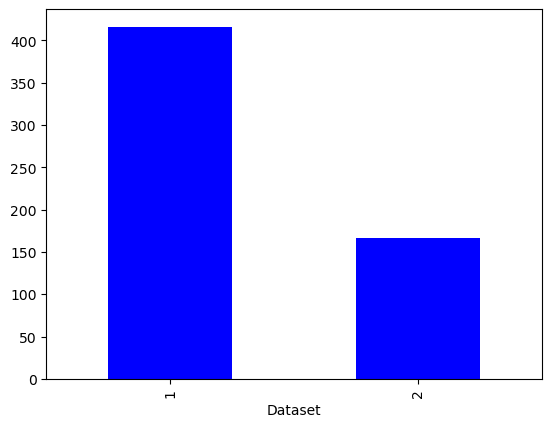

In [9]:
patients['Dataset'].value_counts().plot.bar(color='blue')

**Let us check for the null values:**

In [10]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

**We can see that there are 4 null values in the Albumin and Globulin Ratio column.**

**Let us fill these null values by imputing the mean of that column.**

In [11]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [12]:
patients=patients.fillna(0.94)

**Yes! Now we have filled the null values with the mean of that column.** 

In [13]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**So we have removed all the null values and we are ready to go !**

**Let us check the age group of the patients.**

<Axes: xlabel='Age'>

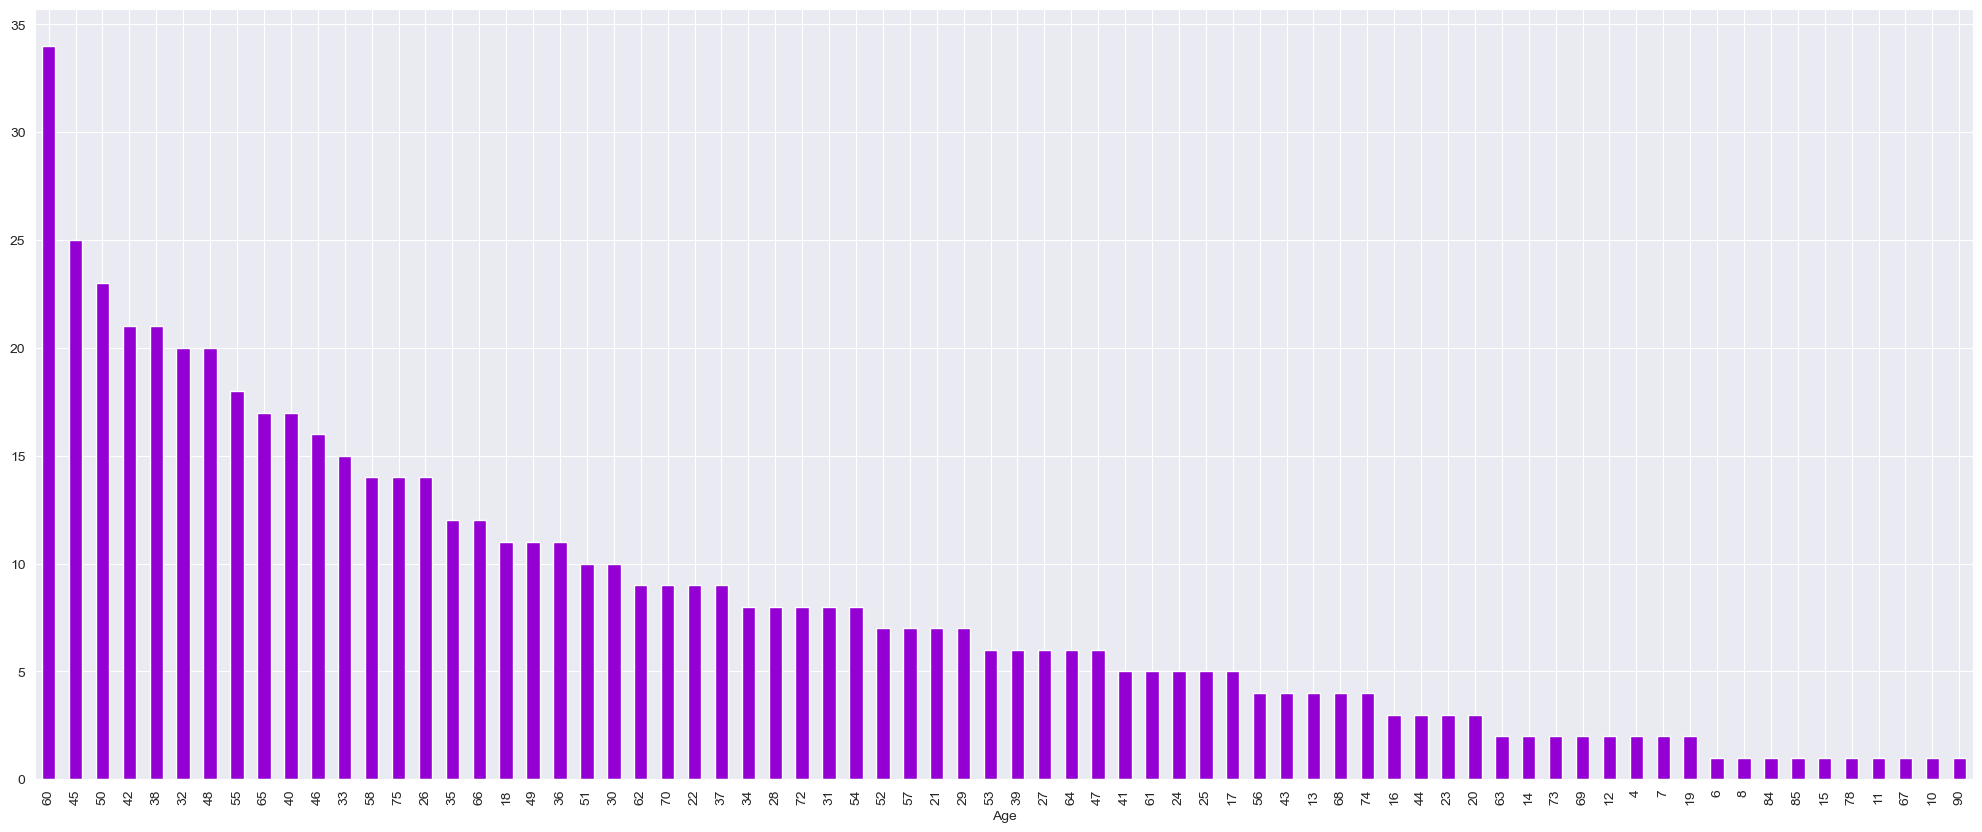

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

**Let us view the pairplot of patients based on Gender.**

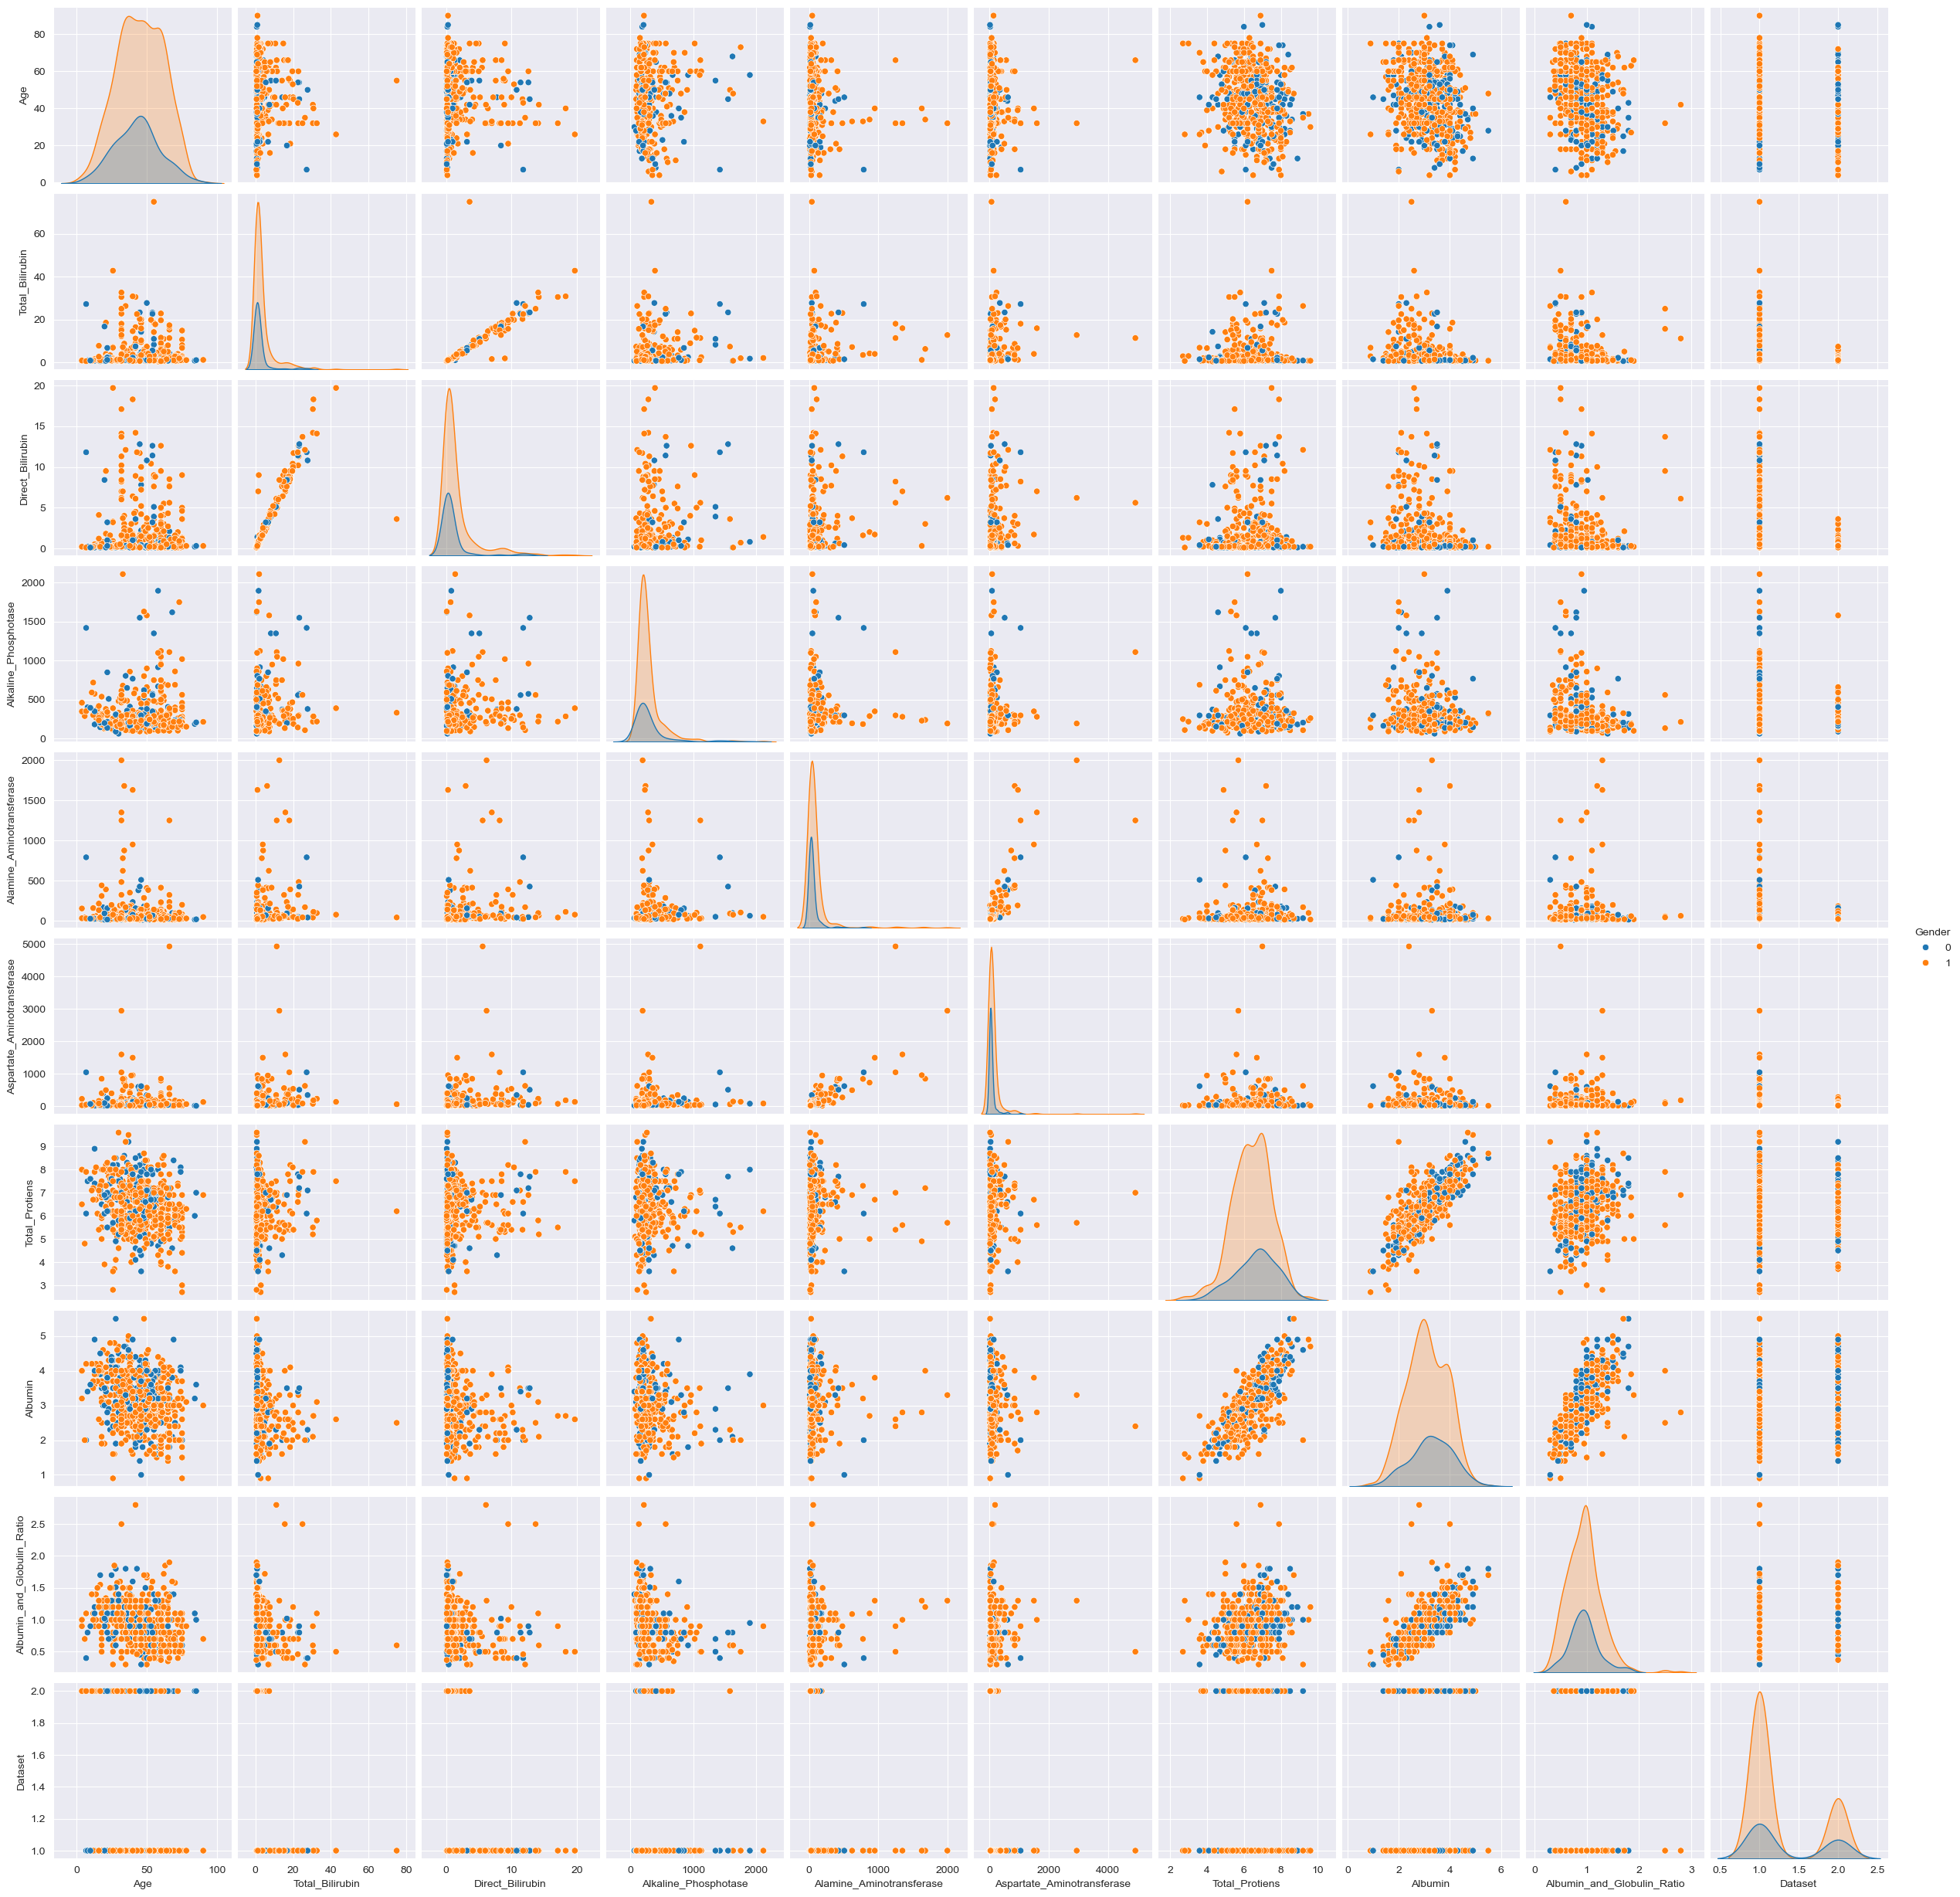

In [15]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

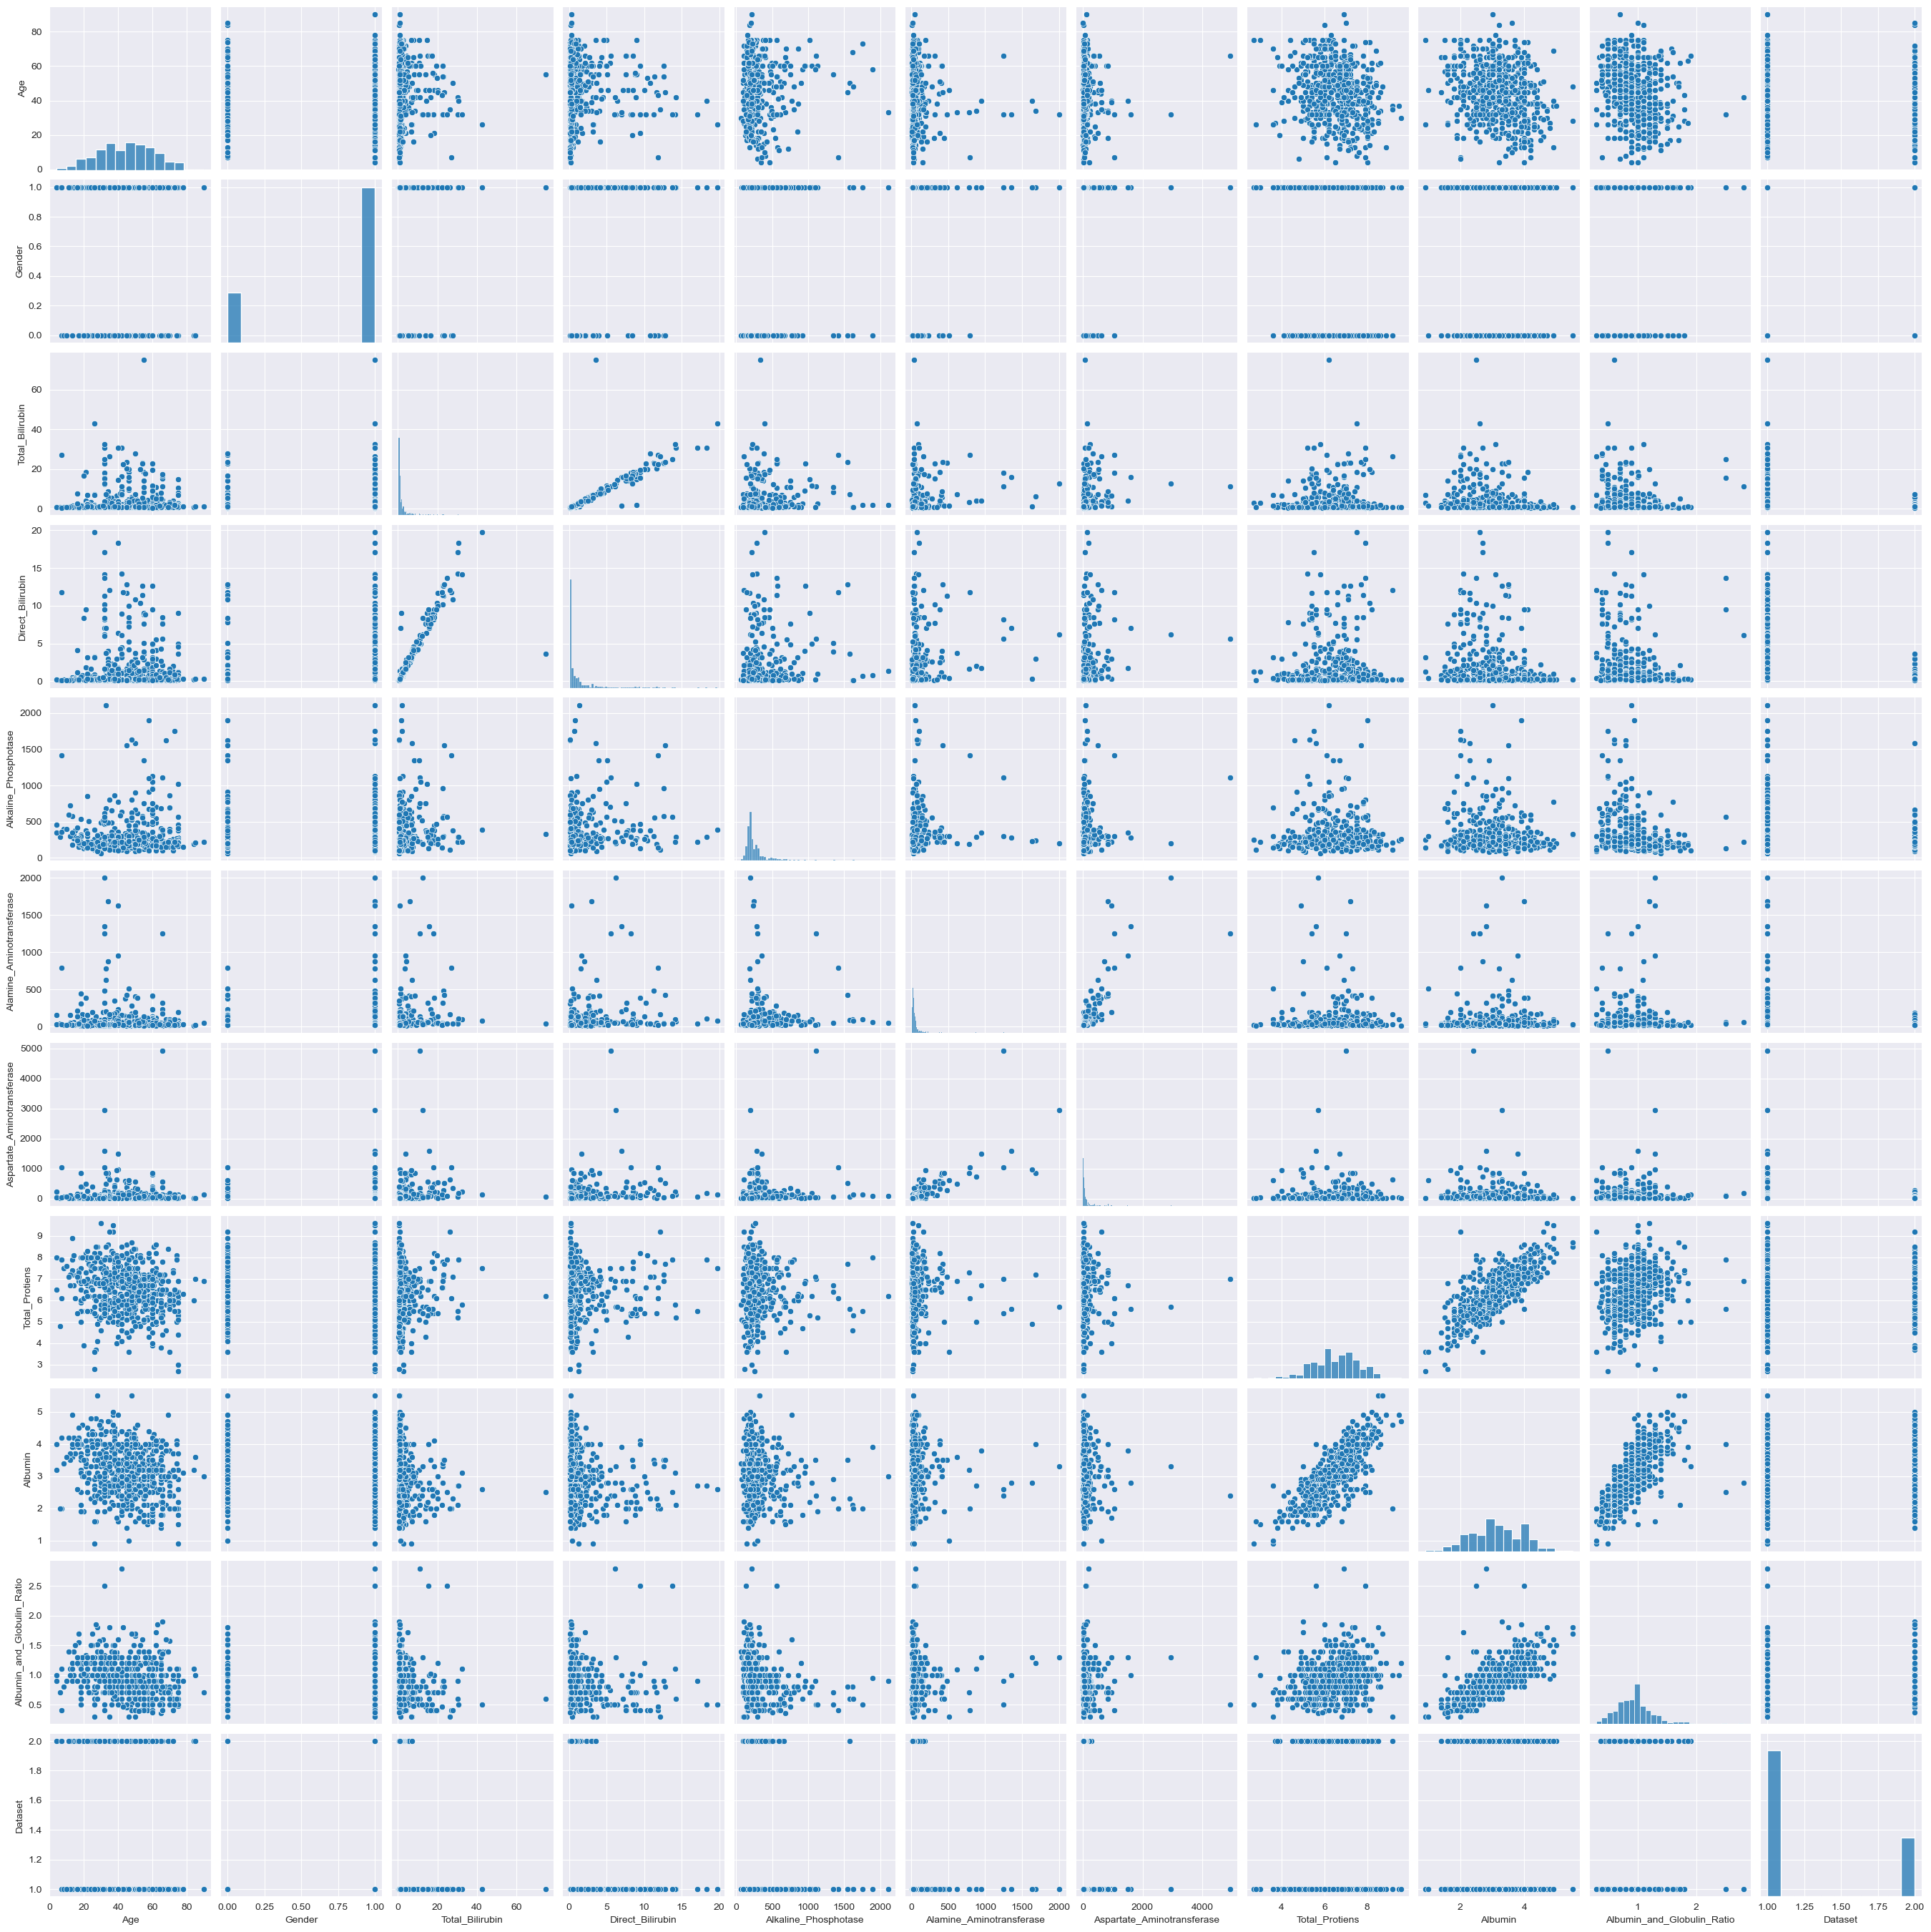

In [16]:
sns.pairplot(patients)

**Let us compare the albumin and albumin and globulin ratio by a scatterplot.**

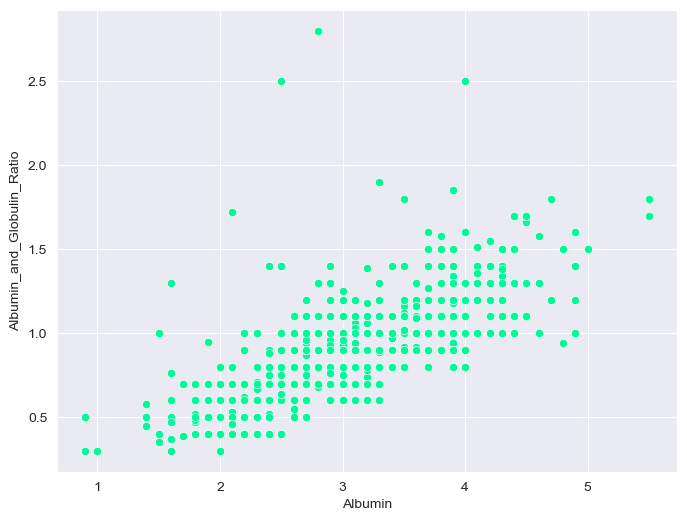

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

**Let us compare the Gender based on the Protein Intake.**

<Axes: xlabel='Gender'>

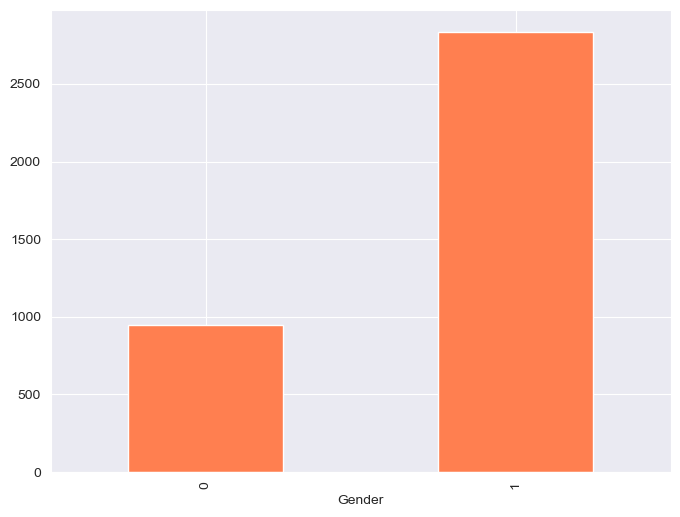

In [18]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

**So protein intake is higher in the case of Male and comparitively less in females.**

**Let us compare male and female based on Albumin Level.**

<Axes: xlabel='Gender'>

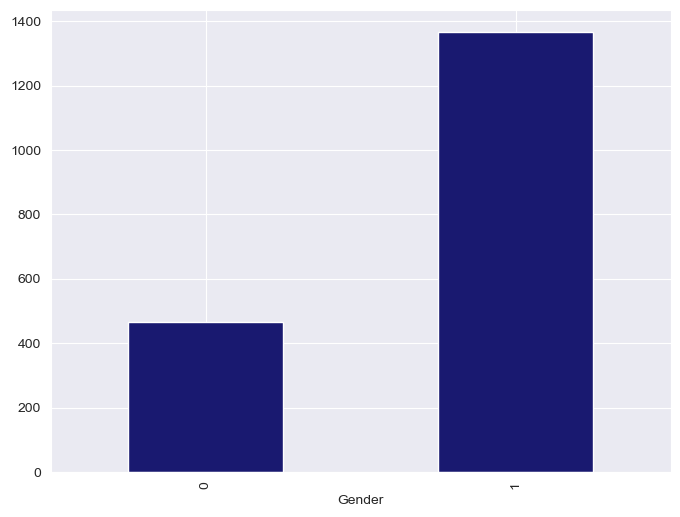

In [19]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

**Albumin Level is higher in the case in the case of male compared to female.**

**Finally Let us compare them based on the Bilirubin content.**

<Axes: xlabel='Gender'>

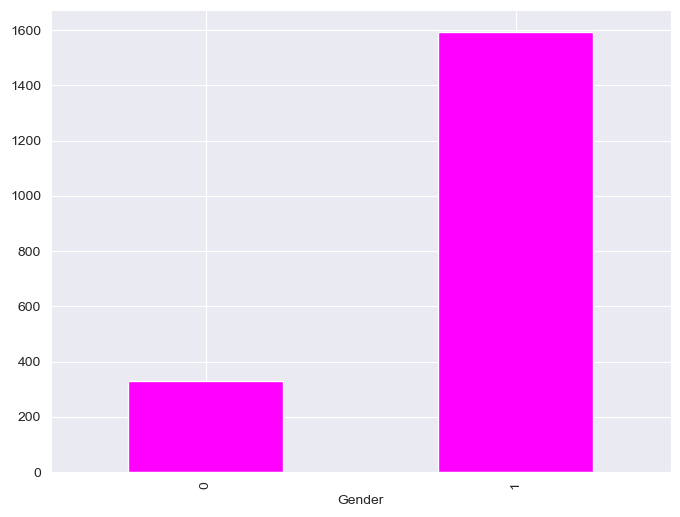

In [20]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

**We can clearly see that males has more bilirubin content compared to females.**

**Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.**

**Let us check the correlation between the features using a heatmap:**

In [21]:
corr=patients.corr()

<Axes: >

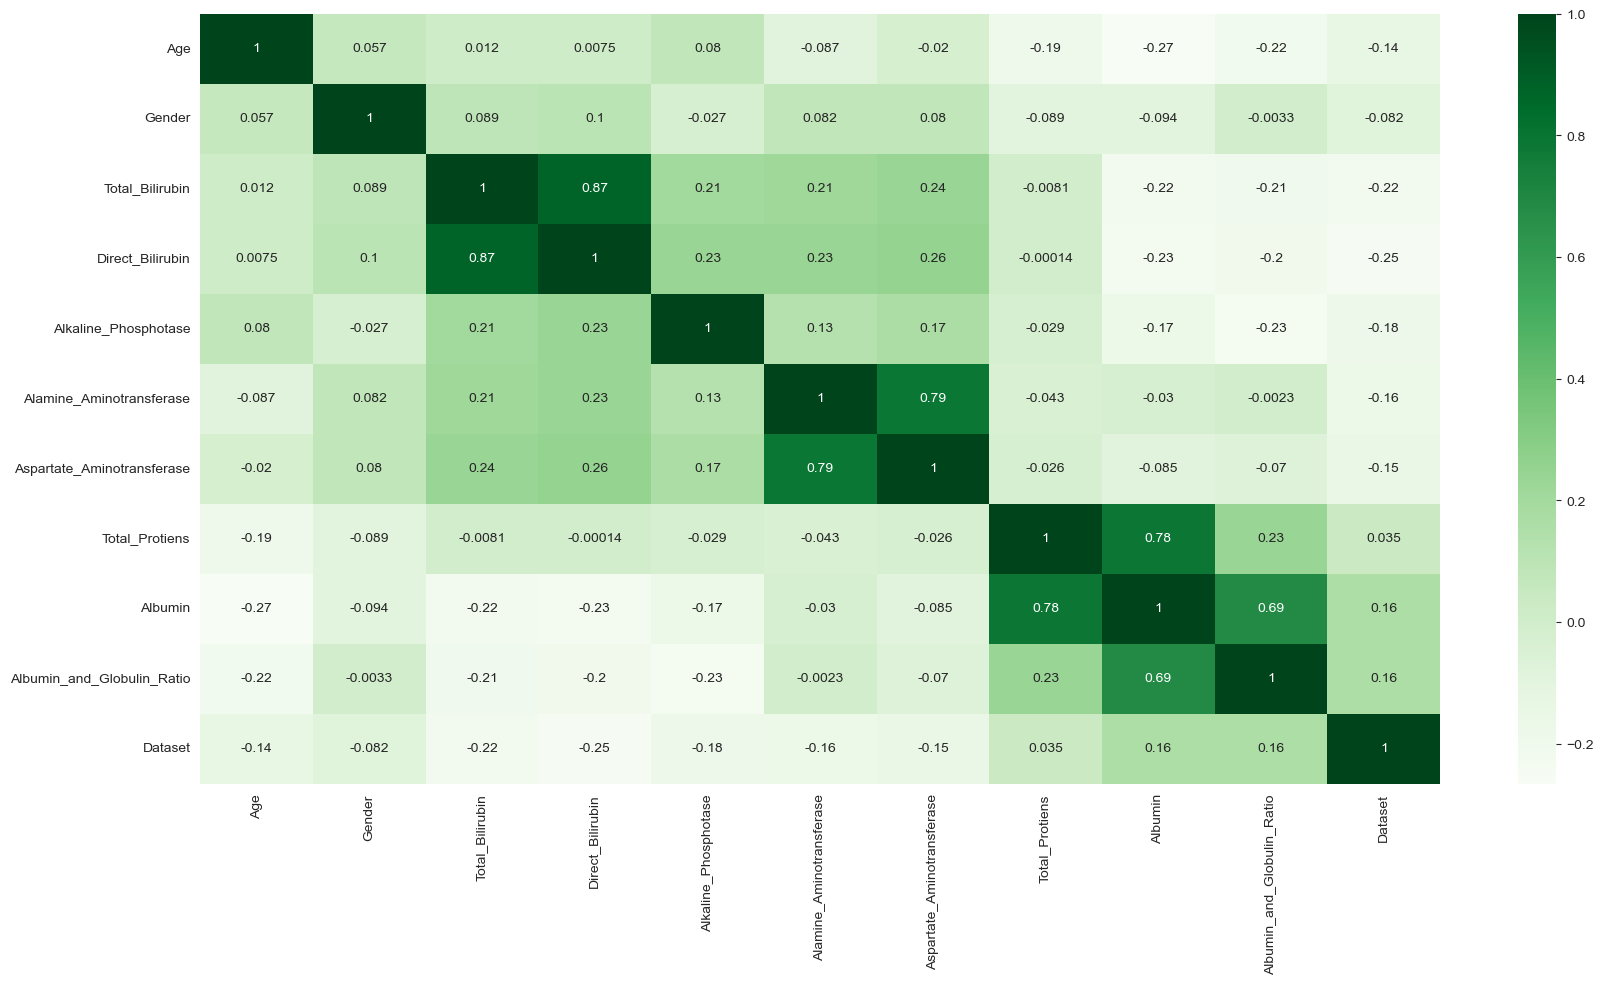

In [22]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

**So Let us start building our model.**

**Inorder to build a successful model we have to train and test the model.**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

**Now let us define our X and y.**

**Here X is our features and y is our target.**

In [25]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

**We split the training and testing  in a certain ratio as 70 for training and 30 for testing.**

**Now inorder to build our model we use Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

**Now, Let us import the cross validation score and Kfold and split them into 5.**

**Finally, we are calculating the accuracy of our model.**

**Thus we can conclude that our model performed at an accuracy of 71.5%.**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [29]:
# Evaluate (optional)
y_pred = logmodel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7257142857142858
Confusion Matrix:
 [[118   8]
 [ 40   9]]


In [30]:
import pickle
with open("../Models/liver_disease_model.pkl", "wb") as f:
    pickle.dump(logmodel, f)

In [31]:
y_test

263    1
54     1
503    1
192    1
458    1
      ..
416    1
246    1
49     1
231    1
479    1
Name: Dataset, Length: 175, dtype: int64

In [32]:
patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [33]:
X_test.loc[:471]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
263,38,0,0.8,0.2,185,25,21,7.0,3.0,0.70
54,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50
503,53,1,19.8,10.4,238,39,221,8.1,2.5,0.40
192,60,1,2.3,0.6,272,79,51,6.6,3.5,1.10
458,26,1,6.8,3.2,140,37,19,3.6,0.9,0.30
356,33,1,0.7,0.2,256,21,30,8.5,3.9,0.80
35,30,1,1.3,0.4,482,102,80,6.9,3.3,0.90
299,24,0,0.9,0.2,195,40,35,7.4,4.1,1.20
374,56,0,0.7,0.1,145,26,23,7.0,4.0,1.30
561,66,1,16.6,7.6,315,233,384,6.9,2.0,0.40


In [34]:
import pickle

with open("../Models/liver_disease_model.pkl", "rb") as f:
    model = pickle.load(f)

# Then use it like:
model.predict([[49,0	,0.6,	0.1,	185,	17,	26,	6.6,	2.9,	0.70]])


array([1], dtype=int64)